# Train/Test Split

## What is Train/Test Split?

Train/Test Split is a fundamental step in machine learning where the dataset is divided into two separate parts:

 - Training Set: Used to train the model.

 - Test Set: Used to evaluate the performance of the trained model.

This ensures the model can generalize well to unseen data, rather than just memorizing the training data.

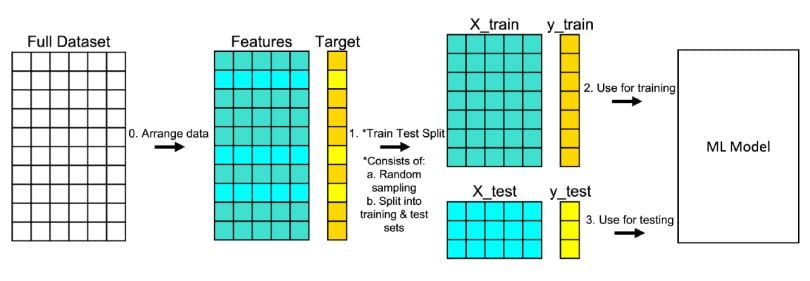

#### scikit-learn notation:

Make sure your data is arranged into a format acceptable for train test split. In scikit-learn, this consists of separating your full dataset into **"Features"** and **"Target"**.

| Notation    | Description |
| -------- | ------- |
|  X_train | Feature training set    |
|  X_test  | Feature testing set     |
|  Y_train | Target trainning  set   |
|  Y_test  | Target testing set      |





Train test split is a model validation procedure that allows you to simulate how a model would perform on new/unseen data by splitting a dataset into a training set and a testing set. The training set is data used to train the model, and the testing set data (which is new to the model) is used to test the model’s performance and accuracy

Why is Train/Test Split Important?

- Generalization Check:
  
  &ensp; It ensures the model can predict accurately on new data.

- Prevents Overfitting:

  &ensp; If we only evaluate on training data, we may end up with a model that performs well only on the known data, but poorly on new, unseen data.

- Objective Performance Evaluation:

  &ensp; Helps in providing an unbiased estimation of the model's predictive performance.

## Common Train/Test Split Ratios

| Split Ratio    | Description |
| -------- | ------- |
| 80% Train / 20% Test  | Most commonly used in large datasets    |
| 70% Train / 30% Test | Preferred when the dataset is relatively small     |



### Methods for Splitting Data in a Train Test Split

Different kinds of datasets require different methods for splitting the data into training and testing sets. Here’s some common methods of splitting data in a train test split:

### 1. Random Splitting

&ensp; Random splitting involves randomly shuffling the dataset and dividing it into training and testing subsets based on specified ratios.

&ensp; This approach is widely used due to its simplicity and ease of implementation, and is the default behavior in **scikit-learn's train_test_split()** function.

&ensp; Random splitting works best with large and diverse datasets where the distribution of categories is relatively uniform across the data.

### 2. Stratified Splitting

&ensp; Stratified splitting ensures that the proportions of different classes or categories are maintained in both the training and testing sets, reflecting the original dataset's distribution.

&ensp; This method is particularly valuable when working with imbalanced datasets or datasets where certain categories are underrepresented, as it helps prevent bias in model training and evaluation.

&ensp; In scikit-learn, stratified splitting can be implemented by using the stratify parameter within the train_test_split() function.

### 3. Time-Based Splitting
&ensp; Time-based splitting organizes data chronologically, ensuring that the training set contains earlier data points while the testing set contains more recent ones.

&ensp; This approach is ideal for time series forecasting tasks or scenarios where predictions are made on future data, such as in financial market trend analysis.

&ensp; While this method aligns well with real-world use cases, it has limitations, particularly with non-stationary data where patterns evolve over time, potentially reducing predictive accuracy.
For time series data in scikit-learn, the TimeSeriesSplit() method is recommended for such splits.

---

## Example


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


### 1. load Data

In [ ]:
df = pd.read_csv("kc_house_data.csv")
# Selecting columns I am interested in
columns = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','price']
df = df.loc[:, columns]
df.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,3,1.00,1180,5650,1.0,221900.0
1,3,2.25,2570,7242,2.0,538000.0
2,2,1.00,770,10000,1.0,180000.0
3,4,3.00,1960,5000,1.0,604000.0
4,3,2.00,1680,8080,1.0,510000.0
5,4,4.50,5420,101930,1.0,1225000.0
6,3,2.25,1715,6819,2.0,257500.0
7,3,1.50,1060,9711,1.0,291850.0
8,3,1.00,1780,7470,1.0,229500.0
9,3,2.50,1890,6560,2.0,323000.0


### 2. Arrange Data into Features and Target

In [3]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors']
X = df.loc[:, features]
y = df.loc[:, ['price']]

### 3. Split Data Into Training and Testing Sets


we are splitting the data in 80-20% 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .8)


### Note:

**random_state**

* The random_state acts as a seed for the pseudo-random number generator, ensuring that the data split remains consistent every time the code is executed.

* Using random_state is common in scenarios such as software testing, tutorials, and presentations, where reproducibility is essential.

However, when evaluating how well a model can generalize to unseen data, it is generally advisable to avoid setting random_state, allowing for truly random splits.

---

### Best Practices in Train/Test Split

* Shuffle the data (default in sklearn is shuffle=True) unless it's time series data.

* Use stratified sampling for classification tasks with imbalanced datasets.

* Always use a fixed random_state during experimentation for reproducibility.

---

### Extending to Train/Validation/Test Split

For hyperparameter tuning and model selection, you can add a Validation Set:

* Training Set: Used to train the model.

* Validation Set: Used to fine-tune model hyperparameters.

* Test Set: Used for final unbiased evaluation.

Typical split:

 - 70% Training
 
 - 15% Validation

 - 15% Test